In [11]:
import pandas as pd
import numpy as np


df = pd.read_csv('russian_demography.csv')
print("regions = ", len(set(df['region'])))
# "birth_rate" - number of births by 1000 people
# new birth_rate by 1000 * 85 (85.000) people
df

regions =  85


,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70


In [29]:
df_2 = df.copy()
df_2 = df_2.drop(columns=["npg", "death_rate", "gdw", "urbanization"])
df_2 = pd.DataFrame(df_2.groupby(['year'], as_index=False).sum()).drop(columns=["region"])
df_2

,year,birth_rate
0,1990,1177.1
1,1991,1063.7
2,1992,941.3
3,1993,813.8
4,1994,828.5
5,1995,821.8
6,1996,783.8
7,1997,757.7
8,1998,778.0
9,1999,735.2


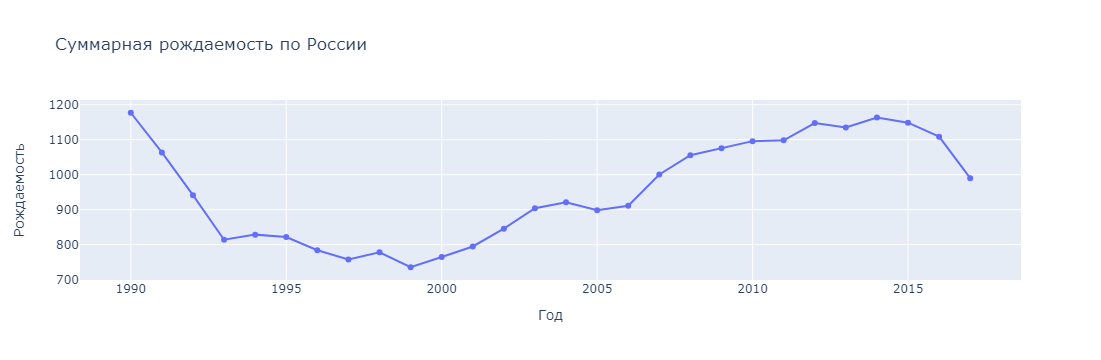

In [30]:
import plotly.express as px
import plotly.graph_objects as go


def plot(data, dots: bool = False, title: str = ""):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x = data["year"], y = data["birth_rate"], mode='lines+markers'))
    fig.update_layout(
        title="Суммарная рождаемость по России" + title,
        yaxis_title="Рождаемость",
        xaxis_title="Год"
    )

    if dots:
        fig.add_trace(go.Scatter(x = data["year"], y = data["orig_birth_rate"], mode='markers'))
    
    # fig = px.scatter(data,
    #              x="year",
    #              y="birth_rate",
    # Tendency of graph ->
    #              # trendline="lowess",
    #              # trendline_color_override='black',
    #              # trendline_scope='overall',
    #             )
    return fig

plot(df_2).show()

In [31]:
from sklearn.linear_model import LinearRegression

def regression(data, last: int = None):
    if last is None:
        last = len(data.index)
    
    reg = pd.DataFrame()
    reg['year'] = data['year'][-last:]
    
    x = np.array(data['year'][-last:]).reshape((-1, 1))
    y = np.array(data['birth_rate'][-last:])
    
    model = LinearRegression().fit(x, y)
    reg['birth_rate'] = model.predict(x)
    reg['orig_birth_rate'] = data['birth_rate'][-last:]
    return reg

reg = regression(df_2)
reg

,year,birth_rate,orig_birth_rate
0,1990,818.120443,1177.1
1,1991,828.311522,1063.7
2,1992,838.502600,941.3
3,1993,848.693678,813.8
4,1994,858.884756,828.5
5,1995,869.075835,821.8
6,1996,879.266913,783.8
7,1997,889.457991,757.7
8,1998,899.649070,778.0
9,1999,909.840148,735.2


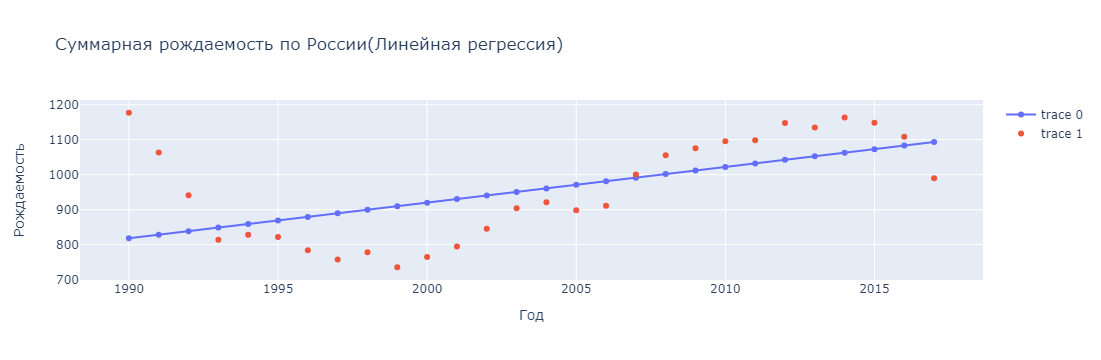

In [32]:
plot(reg, True, "(Линейная регрессия)").show()